# 📐 Square Root Transformer ($y = \sqrt{x}$)

The Square Root Transformer is a power transformation that reduces **Right Skewness**. It is the standard tool for "taming" data where the variance increases with the mean, commonly found in count-based data.

---

### 1. How it Works: "The Moderate Compressor"
The square root function ($y = \sqrt{x}$) compresses the scale of a variable, but not as aggressively as the log function.

* **Small Values:** Are reduced slightly (e.g., $\sqrt{4} = 2$).
* **Large Values:** Are reduced significantly more (e.g., $\sqrt{100} = 10$ or $\sqrt{10,000} = 100$).
* **Result:** It pulls the "long tail" on the right back toward the center, helping to normalize the distribution.



---

### 2. When to Use the Square Root Transformer

#### A. Mild to Moderate Right Skew
If your data has a right tail but isn't as "extreme" as a Log-Normal or Pareto distribution, the Square Root is often the perfect fit.

#### B. Count Data (Poisson Distributions)
This is the most common use case in statistics.
* **Examples:** Number of customers arriving per hour, number of defects in a product, or number of birds in a forest.
* **Why?** In count data, the variance is often equal to the mean ($\sigma^2 = \mu$). The Square Root transform is a **"Variance Stabilizing Transformation"**—it makes the variance roughly constant regardless of the mean.



---

### 3. Comparison: Square Root vs. Log

| Feature | Square Root ($\sqrt{x}$) | Log ($\ln x$) |
| :--- | :--- | :--- |
| **Strength** | Moderate | **Strong** |
| **Best for...** | Mild Right Skew / Counts | Extreme Right Skew / Growth |
| **Handling Zeros** | **Works perfectly** ($\sqrt{0} = 0$) | Fails (needs $\log(1+x)$) |
| **Negative Values** | Undefined (Complex) | Undefined |

---

### 4. Critical Warnings ⚠️

* **Negative Numbers:** You cannot take the square root of a negative number in standard data science workflows. If your data has negatives, you must shift it by a constant ($x + |min|$) before transforming.
* **The "Zero" Advantage:** Unlike the Log transform, $\sqrt{x}$ handles zeros naturally. This makes it very popular for datasets with many zero-counts.
* **Interpretability:** While easier to explain than a log-scale to some, it still changes the units of your data (e.g., "Square root of Dollars").

---

### 5. 🐍 Python Implementation


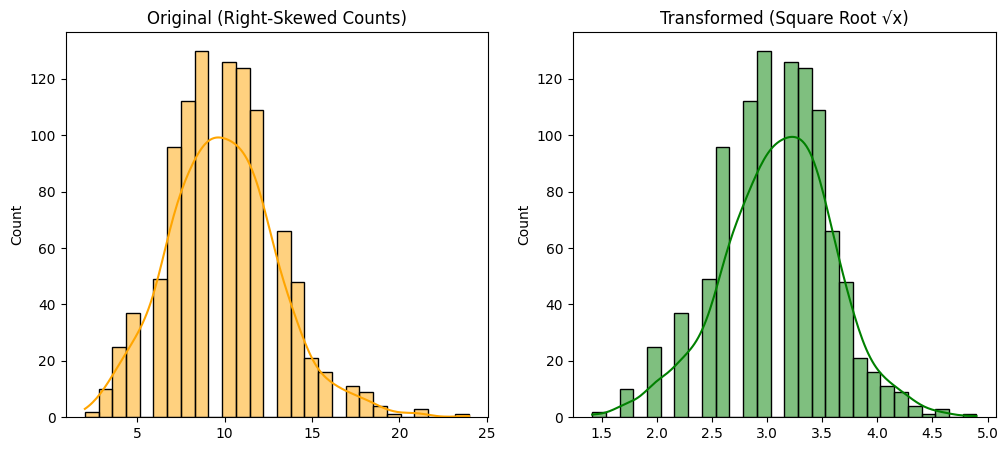

Original Skew: 0.3986
Transformed Skew: -0.1756


In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Poisson-distributed data (Typical Count Data)
data = np.random.poisson(lam=10, size=1000)

# 2. Apply Square Root Transformation
data_sqrt = np.sqrt(data)

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data, kde=True, ax=ax1, color='orange')
ax1.set_title("Original (Right-Skewed Counts)")

sns.histplot(data_sqrt, kde=True, ax=ax2, color='green')
ax2.set_title("Transformed (Square Root √x)")

plt.show()

print(f"Original Skew: {stats.skew(data):.4f}")
print(f"Transformed Skew: {stats.skew(data_sqrt):.4f}")